In [4]:
import pandas as pd
import numpy as np

import tweets_to_df as ttdf
import pickle
#import pickle5 as pickle
import time
import sys

In [5]:
print(sys.version)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]


In [6]:
print(pickle.format_version)

4.0


In [7]:
twitter_accounts_df = pd.read_csv('Twitter_names.csv')
twitter_accounts_df.shape

(6887, 1)

In [8]:
twitter_accounts_df.head()

,twitter_name
0,1Burrana
1,CECOTECoficial
2,detectrespond
3,docebo
4,ElementsGS


In [9]:
twitter_accounts_list = twitter_accounts_df['twitter_name'].to_list()
len(twitter_accounts_list)

6887

In [10]:
#generate a list of indexes
index_list = [x*79+1 for x in range(round(len(twitter_accounts_list)/79))]

In [12]:
index_list[75]

5926

In [16]:
def get_80_accounts_to_pickle(index):

    final_df = ttdf.tweets_to_csv(twitter_accounts_list[index])
    twitter_accounts_list_reduced = twitter_accounts_list[index+1:index+79]
    len(twitter_accounts_list_reduced)
    
    for twitter_account in twitter_accounts_list_reduced:
    
        df = pd.DataFrame()
        try:
            df = ttdf.tweets_to_df(twitter_account)
        except:
            print('Something went wrong')
        if df.empty == False :
            final_df = pd.concat([final_df, df], ignore_index=True)

    final_df.drop_duplicates(keep=False,inplace=True)
    final_df.to_pickle(f'{index}_{index+79}.pkl')

In [ ]:
for index in index_list:
    get_80_accounts_to_pickle(index)
    time.sleep(450)

In [18]:
df1 = pd.read_pickle('5926_6005.pkl')
df2 = pd.read_pickle('6005_6886.pkl')

In [19]:
df = pd.concat([df1, df2], ignore_index=True)

In [20]:
df.drop_duplicates(keep=False,inplace=True)
df.to_pickle('5926_6886.pkl')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242495 entries, 0 to 1242494
Data columns (total 13 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   0       1242495 non-null  object        
 1   1       1242495 non-null  object        
 2   2       1242495 non-null  datetime64[ns]
 3   3       1242495 non-null  int64         
 4   4       1242495 non-null  object        
 5   5       1242495 non-null  int64         
 6   6       1242495 non-null  int64         
 7   7       1242495 non-null  object        
 8   8       1242495 non-null  object        
 9   9       1242495 non-null  object        
 10  10      1231911 non-null  object        
 11  11      1242495 non-null  int64         
 12  12      1242495 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 132.7+ MB


In [23]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12
1010114,Workato,Workato,2020-10-03 17:07:02,1312439024573849600,New Job Alert! 🙌 Our friends at @HashiCorp are...,1,1,en,Buffer,"Mountain View, CA",https://t.co/vVDTG70LgT,2106,534


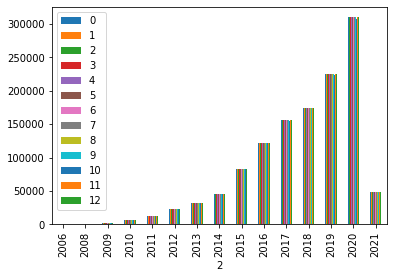

In [30]:
df.groupby([df[2].dt.year]).count().plot(kind='bar')